#### 데이터 시각화
 - 앤스콤 4분할 그래프

In [2]:
import seaborn as sns

In [3]:
anscombe = sns.load_dataset('anscombe')
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [9]:
anscombe.groupby('dataset').var()

,x,y
dataset,,
I,11.0,4.127269
II,11.0,4.127629
III,11.0,4.122620
IV,11.0,4.123249


In [12]:
anscombe[anscombe['dataset'] == 'I'].corr()

,x,y
x,1.000000,0.816421
y,0.816421,1.000000


In [13]:
anscombe[anscombe['dataset'] == 'II'].corr()

,x,y
x,1.000000,0.816237
y,0.816237,1.000000


In [14]:
anscombe[anscombe['dataset'] == 'III'].corr()

,x,y
x,1.000000,0.816287
y,0.816287,1.000000


#### matplotlib 라이브러리로 그래프 그리기

In [4]:
import matplotlib.pyplot as plt

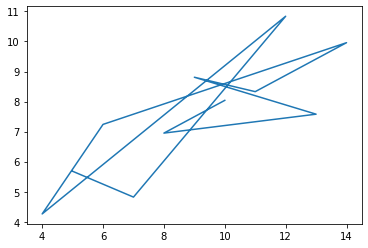

In [15]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']
plt.plot(dataset_1['x'], dataset_1['y'])
plt.show()

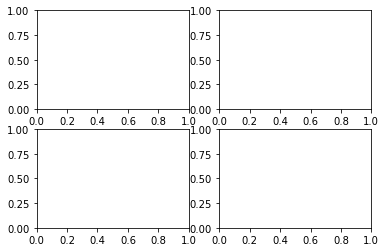

In [16]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

fig = plt.figure()   # 그래프 기본 틀 생성
axes1 = fig.add_subplot(2,2,1)   # row, col, index
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

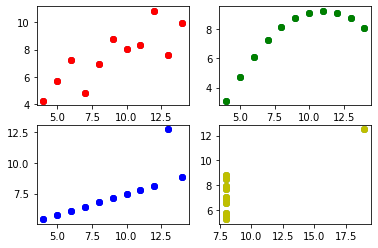

In [19]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'ro')
axes2.plot(dataset_2['x'], dataset_2['y'], 'go')
axes3.plot(dataset_3['x'], dataset_3['y'], 'bo')
axes4.plot(dataset_4['x'], dataset_4['y'], 'yo')

fig

###### 2022-05-30

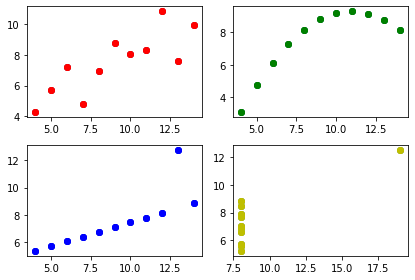

In [20]:
fig.tight_layout()

fig

In [ ]:
# 식당에서 팁을 지불한손님 정보 데이터

In [26]:
tips = sns.load_dataset('tips')
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


In [28]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#### 기초 그래프 그리기 - 히스토그램
 - 데이터의 분포와 빈도를 살펴보는 용도로 자주 사용
 - 'total_bill', 'tip' 등의 열: 변수

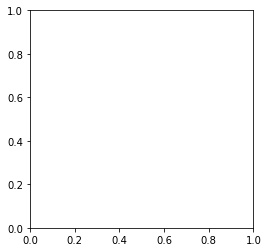

In [40]:
# 기본 틀(figure)을 준비하고 그래프 격자 구성
fig = plt.figure(figsize=(4,4)) #figsize=(5,5), dpi=1000
axes1 = fig.add_subplot(1,1,1)

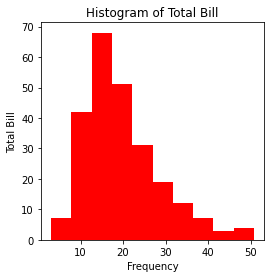

In [42]:
axes1.hist(tips['total_bill'], bins=10, color='red')
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

fig

Text(0, 0.5, 'Tip')

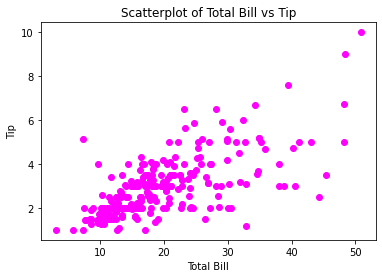

In [43]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'], c='magenta')
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

#### 기초 그래프 - 박스 그래프
 - 이산형 변수와 연속형 변수를 함께 사용하는 그래프
 - 이산형 변수 : 성별, 지역, 학교 등 명확하게 구분되는 범주 값
 - 연속형 변수 : 비율, 가격, 나이 등 명확하게 구분하지 못하는 범위 값

Text(0.5, 1.0, 'Boxplot of Tips by Gender')

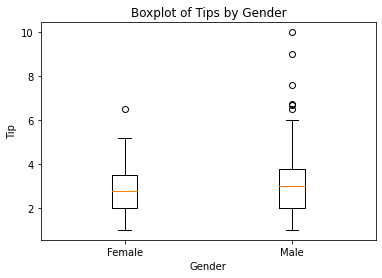

In [44]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)

axes1.boxplot(
    [tips[tips['sex'] == 'Female']['tip'],
     tips[tips['sex'] == 'Male']['tip']],
    labels=['Female', 'Male']
)

axes1.set_xlabel('Gender')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Gender')

#### 다변량 그래프 그리기
 - 3개 이상의 변수를 사용한 그래프
 - x축 : 'total_bill'
 - y축 : 'tip'
 - 마커의 크기(s) : '인원'
 - 마커의 색상(c) : '성별'

In [45]:
# 성별에 따라 마커의 색상을 변경하기 위해 함수 작성
def recode_gender(gender):
    if gender == 'Female' :
        return 'red'
    else:
        return 'blue'

In [46]:
# apply 함수를 사용하여 데이터를 변경한 후 'color' 열에 추가
tips['color'] = tips['sex'].apply(recode_gender)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,color
0,16.99,1.01,Female,No,Sun,Dinner,2,red
1,10.34,1.66,Male,No,Sun,Dinner,3,blue
2,21.01,3.50,Male,No,Sun,Dinner,3,blue
3,23.68,3.31,Male,No,Sun,Dinner,2,blue
4,24.59,3.61,Female,No,Sun,Dinner,4,red


Text(0, 0.5, 'Tip')

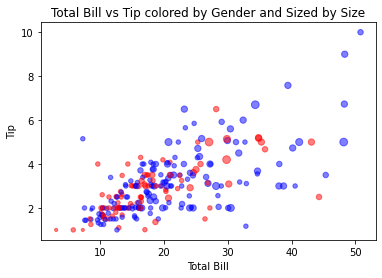

In [47]:
# 산점도 그래프로 표현
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size'] * 10,
    c=tips['color'],
    alpha=0.5
)

axes1.set_title('Total Bill vs Tip colored by Gender and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

#### bar 그래프
 - 카운트를 비교할때 많이 씀

<BarContainer object of 244 artists>

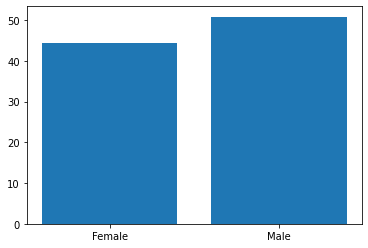

In [49]:
bar_plot = plt.figure()
axes1 = bar_plot.add_subplot(1,1,1)

axes1.bar(tips['sex'], tips['total_bill'])

#### 단변량 그래프 그리기

c:\DEV\Langs\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

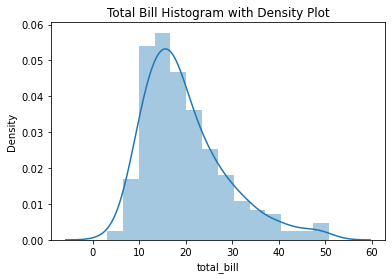

In [50]:
# 히스토그램으로 표현
tips = sns.load_dataset('tips')

ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

c:\DEV\Langs\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

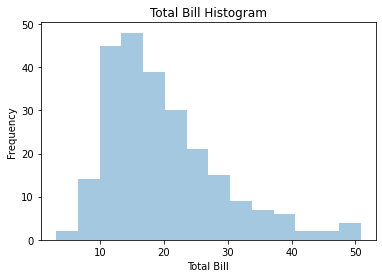

In [51]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde = False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

c:\DEV\Langs\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Unit Probability')

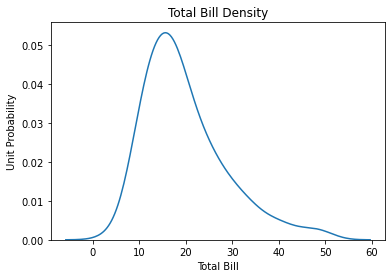

In [52]:
ax = plt.subplot()
ax = sns.distplot(tips['total_bill'], hist = False)
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

#### 이변량 그래프 그리기

Text(0, 0.5, 'Tip')

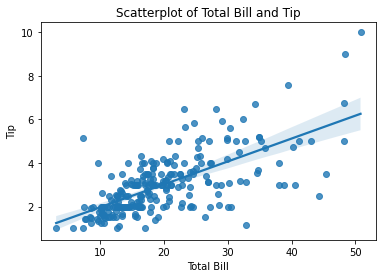

In [53]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

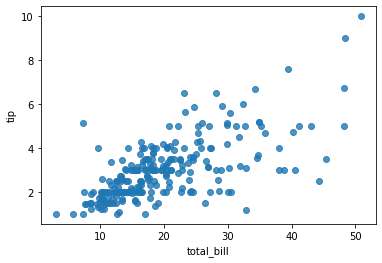

In [54]:
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

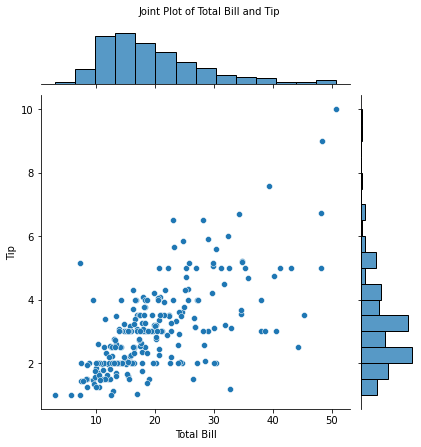

In [58]:
# 산점도와 히스토그램 한번에 표현
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10,
                    y=1.03)

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

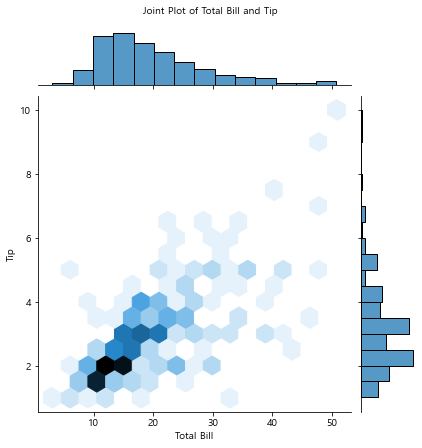

In [77]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10,
                    y=1.03)

Text(0, 0.5, 'Tip')

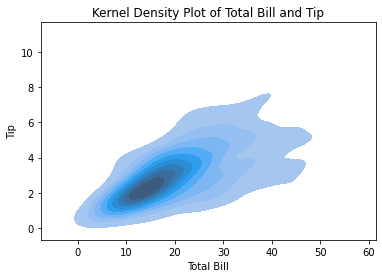

In [60]:
# 이차원 밀집도 표현
ax = plt.subplots()
ax = sns.kdeplot(x=tips['total_bill'], y=tips['tip'], shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Total Bill')

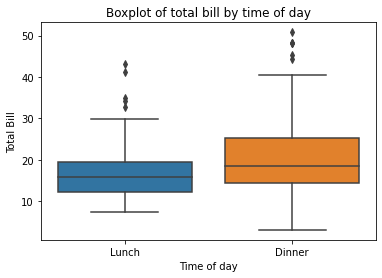

In [61]:
# 박스 그래프 표현
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

Text(0, 0.5, 'Total Bill')

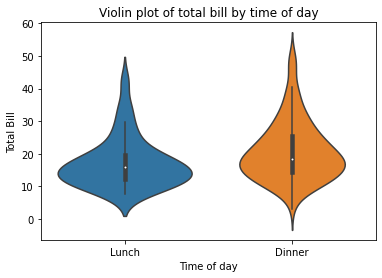

In [62]:
# 박스 그래프 변형 표현
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

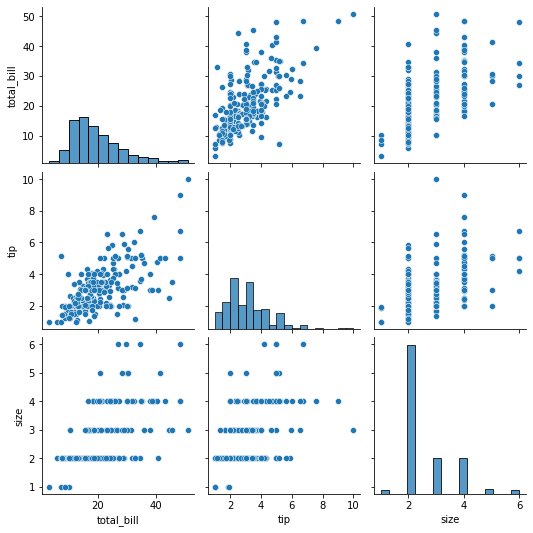

In [63]:
# 관계 그래프 표현
fig = sns.pairplot(tips)

c:\DEV\Langs\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\DEV\Langs\Anaconda\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\DEV\Langs\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\DEV\Langs\Anaconda\lib\site-packages\seaborn\distributions.py:

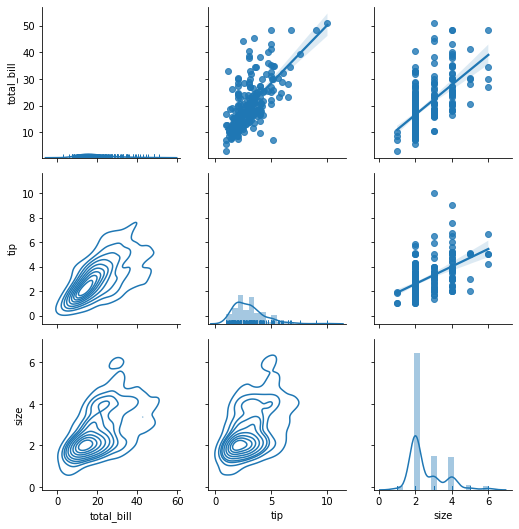

In [64]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
plt.show()

#### 다변량 그래프 그리기

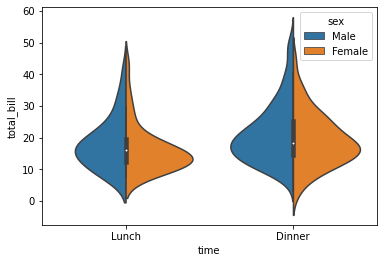

In [65]:
# 색상 추가로 표현
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

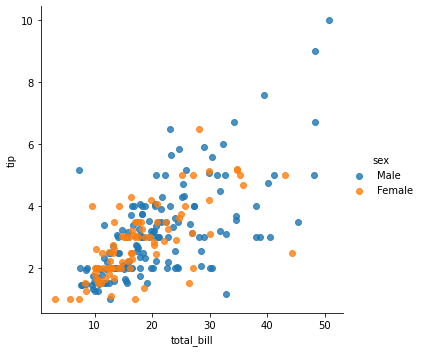

In [66]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

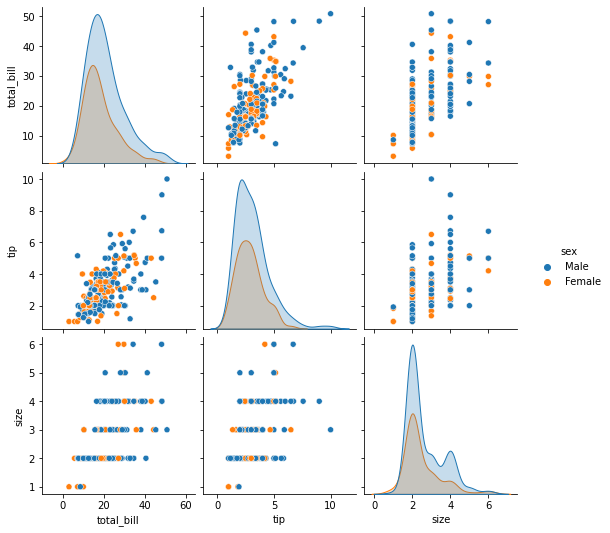

In [67]:
fig = sns.pairplot(tips, hue='sex')

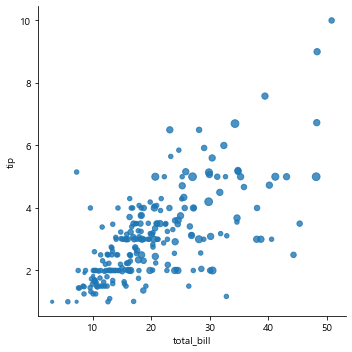

In [74]:
# 크기와 모양으로 표현
sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False,
            scatter_kws={'s': tips['size']*10})

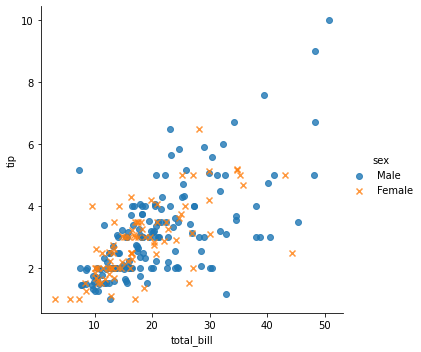

In [69]:
sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex',
            markers=['o','x'])

In [79]:
# 그래프에 한글 폰트 적용법
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#### 데이터프레임과 시리즈로 그래프 그리기

<AxesSubplot:>

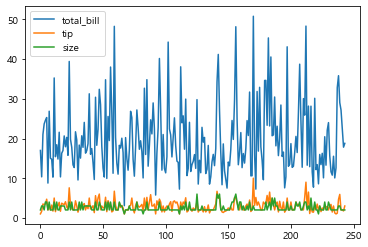

In [80]:
# 데이터프레임 또는 시리즈의 plot메소드 사용
tips.plot()

<AxesSubplot:>

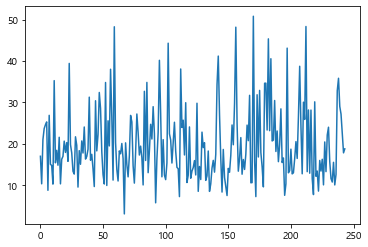

In [81]:
tips['total_bill'].plot()

<AxesSubplot:>

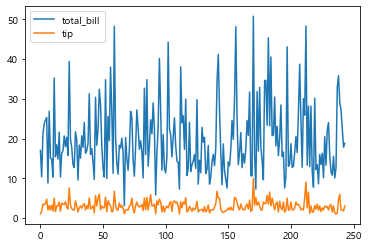

In [82]:
tips[['total_bill', 'tip']].plot()

<AxesSubplot:xlabel='size'>

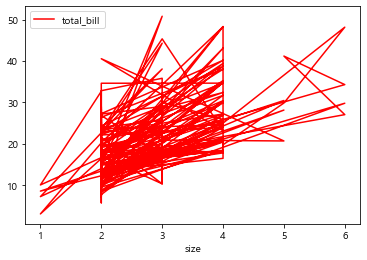

In [83]:
tips[['size', 'total_bill']].plot(x='size', y='total_bill', c='red')

<AxesSubplot:ylabel='Frequency'>

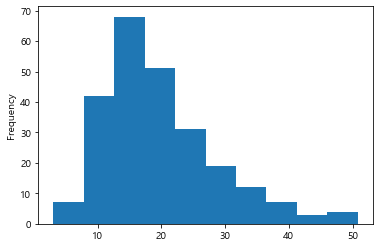

In [84]:
# 데이터프레임 또는 시리즈의 plot 속성에 정의된 여러 메소드 사용
tips['total_bill'].plot.hist()

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

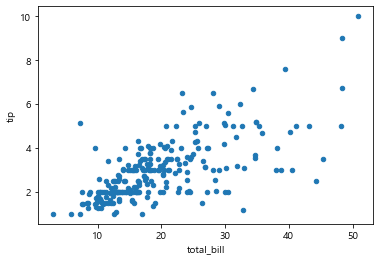

In [85]:
tips.plot.scatter(x='total_bill', y='tip')

<AxesSubplot:>

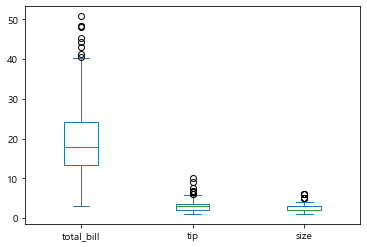

In [86]:
tips.plot.box()

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

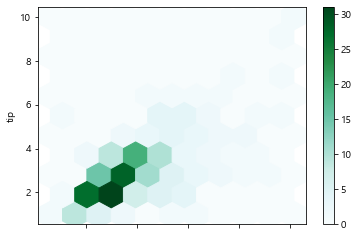

In [87]:
tips.plot.hexbin(
    x='total_bill', y='tip', gridsize=10
)